# SJ_FS_HP_1min_data_processing.ipynb

```
H Thompson
GRAPH
UQAM
Oct 2021
```

# Imports

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
plt.style.use('seaborn-ticks')

# Files

In [121]:
yr = 2021
mnth = ["April","04"]
days = pd.Period(f'{yr}-{mnth[1]}-01').days_in_month
ind = pd.date_range(f'{int(yr)}-{int(mnth[1])}-01 00:00:00',f'{int(yr)}-{int(mnth[1])}-{days} 23:59:00',freq='T')

In [122]:
path = f'../../../SAJESS_SERVER_DATA/FixedStation/hotplate/{yr}_{mnth[1]}/raw/'
hotplate_list = [filename for filename in os.listdir(path) if filename.startswith('Hotplate_data_1min')]

frames = [pd.read_csv(path+hotplate_file, index_col=0, header=None) for hotplate_file in hotplate_list]

cols = ['Precip_rate', 'Tot_accum', 'Temp', 'Baro', 'RH', "Windspeed", 'Status', 'Sensor_power', 'Ref_power']

hp_df = pd.concat(frames)
hp_df.columns = cols
hp_df.index = pd.to_datetime(hp_df.index, infer_datetime_format=True)
hp_df.sort_index(inplace=True)
hp_df.index.rename('Timestamp', inplace=True)
hp_df.index = hp_df.index.floor('min')

hp_df = hp_df[~hp_df.index.duplicated()]

reindxd = hp_df.reindex(index=ind)

reindxd.index.name='Timestamp'

In [125]:
reindxd.index[0],reindxd.index[-1],reindxd.shape

(Timestamp('2021-01-01 00:00:00', freq='T'),
 Timestamp('2021-01-31 23:59:00', freq='T'),
 (44640, 9))

Text(0, 0.5, 'Temp')

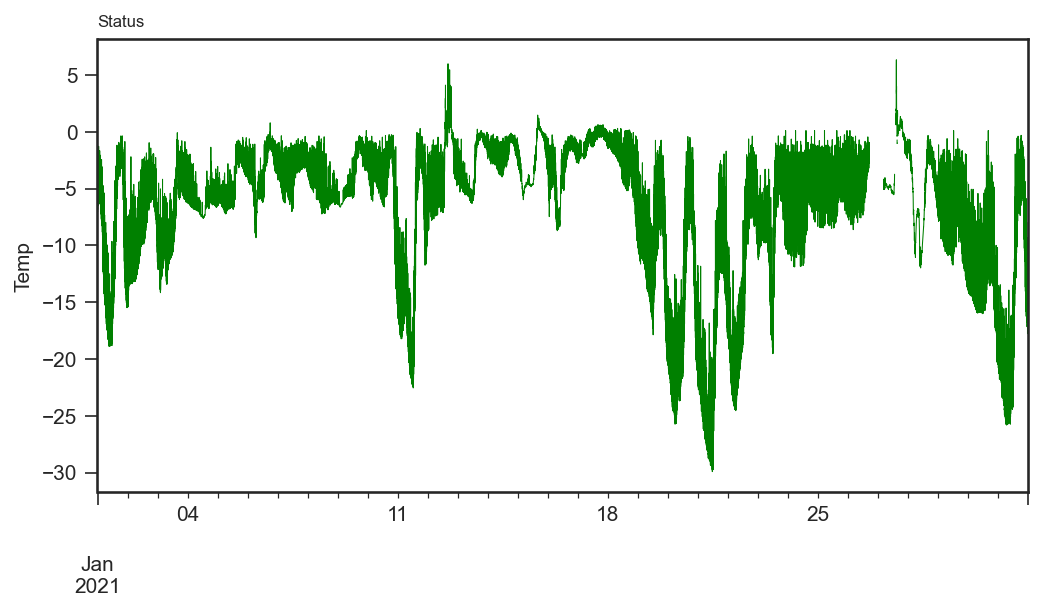

In [126]:
fig, ax = plt.subplots(figsize=(8,4), dpi=150)

#hp_df.Status.loc['2021-01-16':'2021-01-20'].plot(ax=ax, color='green', lw=.5)
reindxd.Temp.plot(ax=ax, color='green', lw=.5)
ax.set_title('Status', loc='left', fontsize=8)
ax.set_ylabel('Temp')

In [129]:
reindxd.to_csv(f'../../../SAJESS_SERVER_DATA/FixedStation/hotplate/{yr}_{mnth[1]}/master/SJ_FS_HP_MAS_1min_{yr}{mnth[1]}.txt')

In [130]:
reindxd

,Precip_rate,Tot_accum,Temp,Baro,RH,Windspeed,Status,Sensor_power,Ref_power
Timestamp,,,,,,,,,
2021-01-01 00:00:00,0.0,81.24,-4.20,0.0,52.7,0.9,1.0,25.8,027.4*0CF0
2021-01-01 00:01:00,0.0,81.24,-6.33,0.0,78.9,1.1,1.0,32.3,031.0*824D
2021-01-01 00:02:00,0.0,81.24,-3.42,0.0,43.6,1.3,1.0,28.9,028.7*A315
2021-01-01 00:03:00,0.0,81.24,-7.04,1003.5,88.3,1.0,1.0,21.6,020.8*2B8B
2021-01-01 00:04:00,0.0,81.24,-7.02,1003.6,88.4,0.6,1.0,27.7,028.5*AB53
...,...,...,...,...,...,...,...,...,...
2021-01-31 23:55:00,0.0,1.52,-15.85,0.0,82.0,1.1,1.0,24.4,024.5*CC89
2021-01-31 23:56:00,0.0,1.52,-16.64,0.0,86.5,0.8,1.0,33.2,032.6*31FE
2021-01-31 23:57:00,0.0,1.52,-15.00,0.0,78.3,1.2,1.0,31.1,030.9*AB8C
